In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("datasets/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
columns = ["Trihalomethanes", "ph", "Sulfate"]
for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [9]:
df.isnull().sum().sum()

np.int64(0)

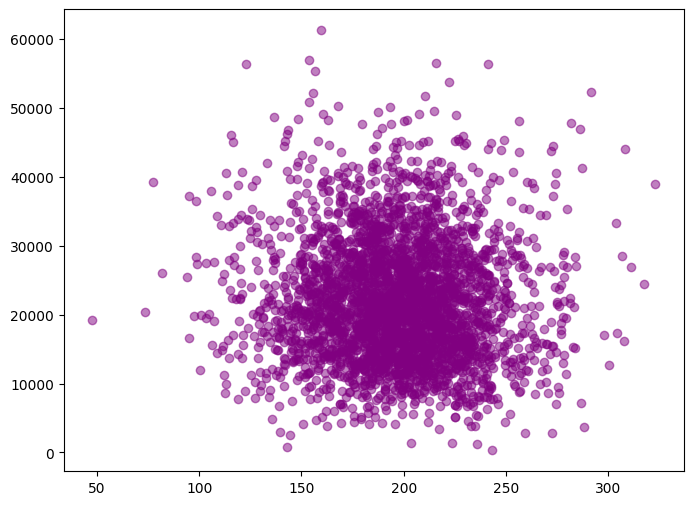

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Hardness'], df['Solids'], alpha=0.5, color='purple')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

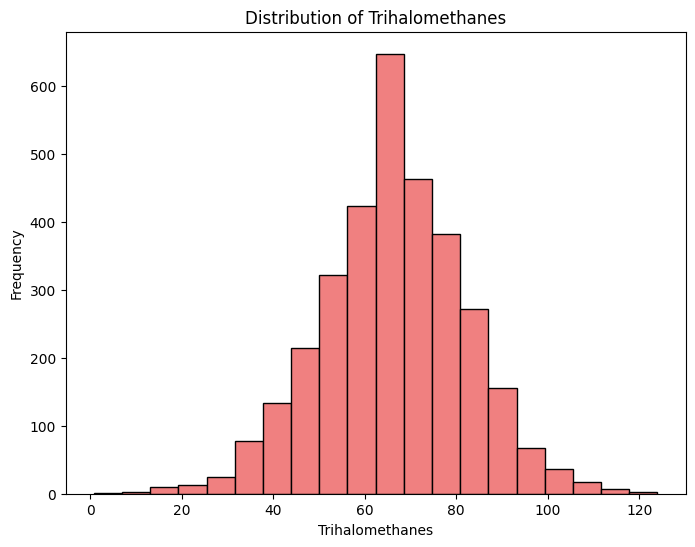

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['Trihalomethanes'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Trihalomethanes')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequency')
plt.show()

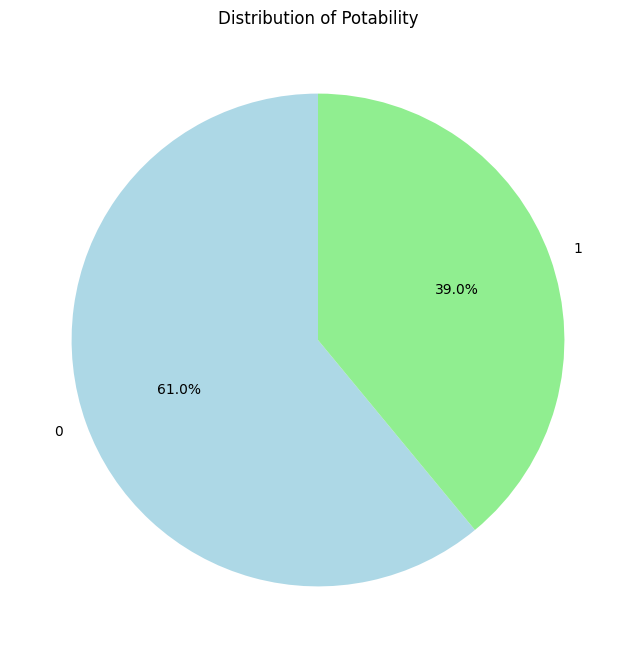

In [29]:
portability_counts = df['Potability'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(portability_counts, labels=portability_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Potability')
plt.show()

In [22]:
x = df.drop(columns=['Potability'])
y = df['Potability']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
model = KNeighborsClassifier(n_neighbors = 5)

In [33]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_prediction = model.predict(x_test)

In [35]:
accuracy = accuracy_score(y_test, y_prediction)
conf_matrix = confusion_matrix(y_test, y_prediction)
class_report = classification_report(y_test, y_prediction)

In [36]:
print("Accuracy: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Classification report: ", class_report)

Accuracy:  0.6280487804878049
Confusion matrix:  [[310 102]
 [142 102]]
Classification report:                precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656

